In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import math
import random

In [38]:
np.random.seed(70)
w_0 = -0.3
w_1 = 0.5
alpha = 2
beta = 25
std_noise = 0.2
mean_noise = 0
a = -1
b = 1
n_size = 20
data_x = np.random.uniform(a,b,size=n_size)
labels = []
noise = np.random.normal(mean_noise,std_noise)
for i in range(len(data_x)):
    labels.append(w_0 + (data_x[i]*w_1)+noise)
labels = np.array(labels)

In [39]:
w0_list = np.linspace(-1,1,100)
w1_list = np.linspace(-1,1,100)
xx1,xx2 = np.meshgrid(w0_list, w1_list)
w_grid = np.array([xx1.flatten(), xx2.flatten()]).T

In [40]:
def density(x, mean, sigma):
    normalized_term = 1/(math.sqrt((2*np.pi)**2 * np.linalg.det(sigma)))
    t1 = np.matmul((x-mean).T ,np.linalg.inv(sigma))
    t2 = np.matmul(t1, (x-mean))
    exp_term = np.exp(-0.5 * t2)
    return normalized_term * exp_term

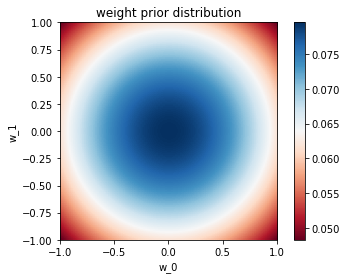

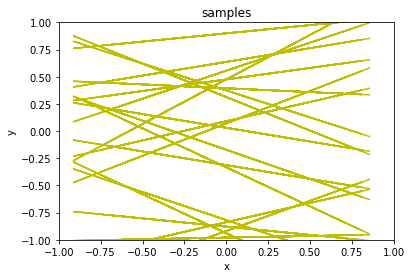

In [48]:
# 1(a)
sigma = alpha * np.identity(2)
prior_density = []
for i in w_grid:
    prior_density.append(density(i, 0, sigma))
prior_density = np.array(prior_density).reshape(100, 100)
plt.title("weight prior distribution")
plt.imshow(prior_density, extent=[-1,1,-1,1], cmap="RdBu")
plt.xlabel("w_0")
plt.ylabel("w_1")
plt.colorbar()
plt.show()
weights = random.choices(population=w_grid, weights=prior_density.flatten(), k=20)
final_w_y = []
for i in weights:
    w_y = []
    for x in data_x:
        w_y.append(i[0] + i[1] * x)
    final_w_y.append(w_y)
plt.title("samples")
for p_i in range(len(final_w_y)):
    plt.xlim(-1,1)
    plt.ylim(-1,1)   
    plt.plot(data_x, final_w_y[p_i], c='y')
    plt.xlabel("x")
    plt.ylabel("y")
plt.show()

In [42]:
def posterior_density(x, mean, sigma):
    normalized_term = 1/(math.sqrt((2*np.pi)**2 * np.linalg.det(sigma)))
    # print(np.linalg.det(sigma))
    t1 = (x-mean).T * np.linalg.inv(sigma)
    t2 = t1 * (x-mean)
    exp_term = np.exp(-0.5 * t2)
    return normalized_term * exp_term

In [43]:
def phi_values_mean(data_x, length):
    a = []
    for i in range(length):
        a.append([1,data_x[i]])
    return np.array(a)
def phi_values_var(data_x, length):
   a = []
   a.append(1)
   for i in range(length):
     a.append(data_x[i])
   return np.array(a)
def labels_values_var(labels, length):
   a = []
   for i in range(length):
     a.append(labels[i])
   return np.array(a)


Posterior distribution of w given 1 data point
posterior mean  [[0.10259383]
 [0.11999824]]
posterior covariance  [[ 1.16507619 -0.97656353]
 [-0.97656353  0.85776844]]


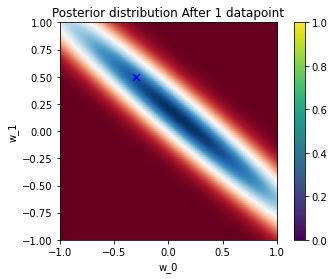

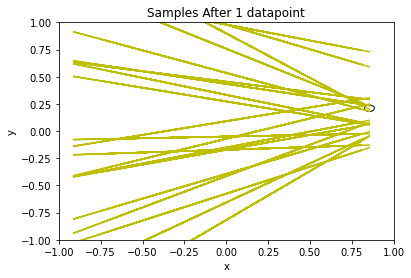

In [54]:
# 1(b)
posterior_covariance = np.linalg.inv(np.linalg.inv(alpha * np.identity(2)) + beta *  np.matmul(np.array([data_x[0], 1]).reshape(-1,1),np.array([data_x[0], 1]).reshape(-1,1).T))
posterior_mean = beta * np.matmul(posterior_covariance , np.array([data_x[0]*labels[0], labels[0]]).reshape((2, 1)))
print("Posterior distribution of w given 1 data point:")
print("posterior mean ",posterior_mean)
print("posterior covariance ",posterior_covariance)
posterior_values = []
for i in w_grid:
        normalized_term = 1/(math.sqrt((2*np.pi)**2 * np.linalg.det(posterior_covariance)))
        t1 = np.matmul((i - posterior_mean.reshape(-1)).T , np.linalg.inv(posterior_covariance))
        t2 = np.matmul(t1, i - posterior_mean.reshape(-1))
        posterior_values.append(normalized_term * np.exp(-0.5 * t2))
posterior_values = np.array(posterior_values).reshape(100, 100)
plt.title("Posterior distribution After 1 datapoint")
plt.imshow(posterior_values, extent=[-1,1,1,-1], cmap="RdBu")

plt.scatter(w_0, w_1, marker = "x",s = 50, c='b')
plt.ylim(-1,1)
plt.xlabel("w_0")
plt.ylabel("w_1")
plt.colorbar()
plt.show()
weights = random.choices(population=w_grid, weights=posterior_values.flatten(), k=20)
final_w_y = []

fig, ax = plt.subplots()
for i in weights:
        w_y = []
        for x in data_x:
                w_y.append(i[0] + i[1] * x)
        final_w_y.append(w_y)

plt.title("Samples After 1 datapoint")
for p_i in range(len(final_w_y)):
        plt.xlim(-1,1)
        plt.ylim(-1,1)   
        ax.plot(data_x, final_w_y[p_i], c='y')
        plt.xlabel("x")
        plt.ylabel("y")

circle1 = plt.Circle((data_x[0], labels[0]), 0.03, color='k', fill=False)
ax.add_patch(circle1)
plt.show()

Posterior distribution of w given after 2 data points: 
posterior mean  [0.05966375 0.15292333]
posterior covariance  [[ 0.66757562 -0.81790947]
 [-0.81790947  1.03273098]]


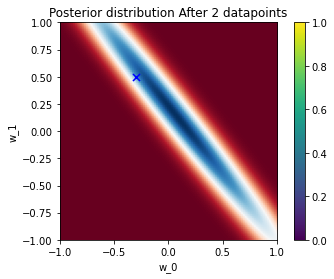

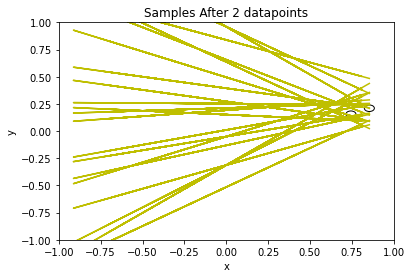

In [55]:
# 1(c)
posterior_covariance = np.linalg.inv(np.linalg.inv(alpha * np.identity(2)) + beta * np.dot(phi_values_mean(data_x,2).T,phi_values_mean(data_x,2)))
posterior_mean = beta * np.dot(posterior_covariance , np.dot(phi_values_mean(data_x,2).T, labels_values_var(labels,2)))
print("Posterior distribution of w given after 2 data points: ")

print("posterior mean ",posterior_mean)
print("posterior covariance ",posterior_covariance)
posterior_values = []
for i in w_grid:
        normalized_term = 1/(math.sqrt((2*np.pi)**2 * np.linalg.det(posterior_covariance)))
        t1 = np.matmul((i - posterior_mean).T , np.linalg.inv(posterior_covariance))
        t2 = np.matmul(t1, i - posterior_mean)
        posterior_values.append(normalized_term * np.exp(-0.5 * t2))
posterior_values = np.array(posterior_values).reshape(100, 100)
plt.title("Posterior distribution After 2 datapoints")
plt.imshow(posterior_values, extent=[-1,1,1,-1], cmap="RdBu")
plt.scatter(w_0, w_1, marker = "x",s = 50, c='b')
# plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("w_0")
plt.ylabel("w_1")
plt.colorbar()
plt.show()
weights = random.choices(population=w_grid, weights=posterior_values.flatten(), k=20)
final_w_y = []
fig, ax = plt.subplots()
for i in weights:
        w_y = []
        for x in data_x:
                w_y.append(i[0] + i[1] * x)
        final_w_y.append(w_y)
plt.title("Samples After 2 datapoints")
for p_i in range(len(final_w_y)):
        plt.xlim(-1,1)
        plt.ylim(-1,1)   
        ax.plot(data_x, final_w_y[p_i],c='y')
        plt.xlabel("x")
        plt.ylabel("y")

circle1 = plt.Circle((data_x[0], labels[0]), 0.03, color='k', fill=False)
circle2 = plt.Circle((data_x[1], labels[1]), 0.03, color='k', fill=False)
ax.add_patch(circle1)
ax.add_patch(circle2)
plt.show()

Posterior distribution of w given 5 data points
posterior mean  [-0.21193288  0.48963438]
posterior covariance  [[ 0.01473039 -0.01533905]
 [-0.01533905  0.03479402]]


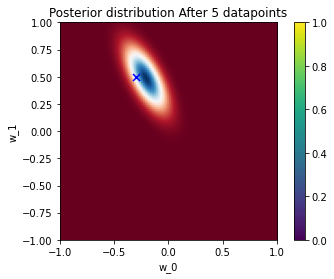

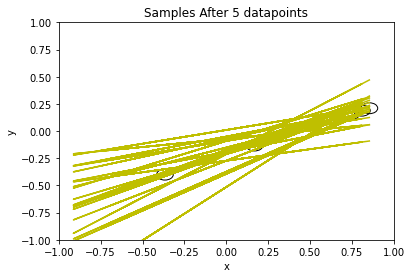

In [56]:
# 1(d)
posterior_covariance = np.linalg.inv(np.linalg.inv(alpha * np.identity(2)) + beta * np.dot(phi_values_mean(data_x,5).T,phi_values_mean(data_x,5)))

posterior_mean = beta * np.matmul(posterior_covariance , np.dot(phi_values_mean(data_x,5).T, labels_values_var(labels,5)))
print("Posterior distribution of w given 5 data points:")
print("posterior mean ",posterior_mean)
print("posterior covariance ",posterior_covariance)
posterior_values = []
for i in w_grid:
        normalized_term = 1/(math.sqrt((2*np.pi)**2 * np.linalg.det(posterior_covariance)))
        t1 = np.matmul((i - posterior_mean).T , np.linalg.inv(posterior_covariance))
        t2 = np.matmul(t1, i - posterior_mean)
        posterior_values.append(normalized_term * np.exp(-0.5 * t2))
posterior_values = np.array(posterior_values).reshape(100, 100)
plt.title("Posterior distribution After 5 datapoints")
plt.imshow(posterior_values, extent=[-1,1,1,-1], cmap="RdBu")
plt.scatter(w_0, w_1, marker = "x",s = 50, c='b')
plt.ylim(-1,1)
plt.xlabel("w_0")
plt.ylabel("w_1")
plt.colorbar()
plt.show()
weights = random.choices(population=w_grid, weights=posterior_values.flatten(), k=20)
final_w_y = []
fig, ax = plt.subplots()
for i in weights:
        w_y = []
        for x in data_x:
                w_y.append(i[0] + i[1] * x)
        final_w_y.append(w_y)
plt.title("Samples After 5 datapoints")
for p_i in range(len(final_w_y)):
        plt.xlim(-1,1)
        plt.ylim(-1,1)   
        ax.plot(data_x, final_w_y[p_i],c='y')
        plt.xlabel("x")
        plt.ylabel("y")

circle1 = plt.Circle((data_x[0], labels[0]), 0.05, color='k', fill=False)
circle2 = plt.Circle((data_x[1], labels[1]), 0.05, color='k', fill=False)
circle3 = plt.Circle((data_x[2], labels[2]), 0.05, color='k', fill=False)
circle4 = plt.Circle((data_x[3], labels[3]), 0.05, color='k', fill=False)
circle5 = plt.Circle((data_x[4], labels[4]), 0.05, color='k', fill=False)

ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)
ax.add_patch(circle4)
ax.add_patch(circle5)
plt.show()

posterior mean  [-0.21722934  0.4984115 ]
posterior covariance  [[0.00201361 0.00031833]
 [0.00031833 0.0064924 ]]


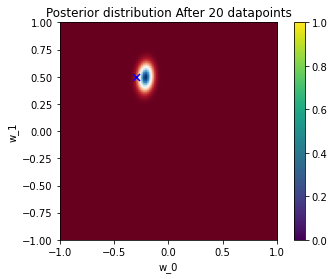

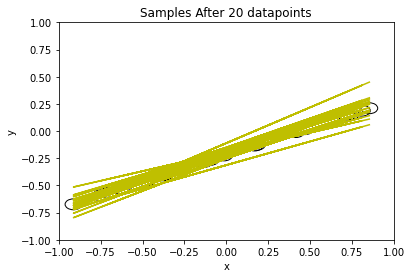

In [53]:
# 1(e)
posterior_covariance = np.linalg.inv(np.linalg.inv(alpha * np.identity(2)) + beta * np.dot(phi_values_mean(data_x,20).T,phi_values_mean(data_x,20)))
posterior_mean = beta * np.dot(posterior_covariance , np.dot(phi_values_mean(data_x,20).T, labels_values_var(labels,20)))
print("Posterior distribution of w given all the 20 data points:")
print("posterior mean ",posterior_mean)
print("posterior covariance ",posterior_covariance)


posterior_values = []
for i in w_grid:
        normalized_term = 1/(math.sqrt((2*np.pi)**2 * np.linalg.det(posterior_covariance)))
        t1 = np.dot(i - posterior_mean , np.linalg.inv(posterior_covariance))
        t2 = np.dot(t1, i - posterior_mean)
        posterior_values.append(normalized_term * np.exp(-0.5 * t2))
posterior_values = np.array(posterior_values).reshape(100, 100)
plt.title("Posterior distribution After 20 datapoints")
plt.imshow(posterior_values, extent=[-1,1,1,-1], cmap="RdBu")
plt.scatter(w_0, w_1, marker = "x",s = 50, c='b')
plt.ylim(-1,1)
plt.xlabel("w_0")
plt.ylabel("w_1")
plt.colorbar()
plt.show()

weights = random.choices(population=w_grid, weights=posterior_values.flatten(), k=20)
final_w_y = []
fig, ax = plt.subplots()
for i in weights:
        w_y = []
        for x in data_x:
                w_y.append(i[0] + i[1] * x)
        final_w_y.append(w_y)
plt.title("Samples After 20 datapoints")
for p_i in range(len(final_w_y)):
        plt.xlim(-1,1)
        plt.ylim(-1,1)   
        ax.plot(data_x, final_w_y[p_i],c='y')
        plt.xlabel("x")
        plt.ylabel("y")
# plt.plot(data_x[0], labels[0], 'o', )
# plt.scatter(data_x, labels, marker = "o",s = 100,c='k')
for i in range(len(data_x)):
  circle1 = plt.Circle((data_x[i], labels[i]), 0.05, color='k', fill=False)
  ax.add_patch(circle1)
plt.show()
